#                                                               Esercitazione 8
## 4 e 18 Aprile 2023

In [16]:
import numpy as np
import scipy as sp
from scipy.linalg import lu
from scipy.linalg import cholesky
from scipy.linalg import qr
import matplotlib.pyplot as plt


In [17]:
# Funzione di supporto per Gauss Seidel
def Lsolve(L, b):
    # test dimensione sulla possibile differenza tra righe e colonne
    m, n = L.shape
    flag = 0
    if n != m:
        print("Matrice non quadrata")
        flag = 1
        x = []
        return x, flag

    # Test sulla singolarità: prodotto delle diagonali per vedere che queste non si annullino
    if np.all(np.diag(L)) != True:
        print("Diagonale nulla, matrice triangolare inferiore")
        flag = 1
        x = []
        return x, flag

    # Algoritmo vero e proprio
    x = np.zeros((n, 1))

    # Eseguo il prodotto scalare tra la riga i-esima e le i-1 componenti della soluzione appena calcolata
    for i in range(n):
        s = np.dot(L[i, :i], x[:i])
        x[i] = (b[i] - s) / L[i, i]

    return x, flag


def Usolve(U, b):
    # test dimensione sulla possibile differenza tra righe e colonne
    m, n = U.shape
    flag = 0
    if n != m:
        print("Matrice non quadrata")
        flag = 1
        x = []
        return x, flag

    # Test sulla singolarità: prodotto delle diagonali per vedere che queste non si annullino
    if np.all(np.diag(U)) != True:
        print("Diagonale nulla, matrice triangolare superiore")
        flag = 1
        x = []
        return x, flag

    x = np.zeros((n, 1))

    # Il passo dell'algoritmo agisce al contrario perchè la matrice che viene analizzata è diversa
    for i in range(n-1, -1, -1):
        s = np.dot(U[i, i + 1:n], x[i + 1:n])
        x[i] = (b[i] - s) / U[i, i]

    return x, flag


def LUsolve(P, A, L, U, b):
    pb = np.dot(P, b)
    y, flag = Lsolve(L, pb)
    if flag == 0:
        x, flag = Usolve(U, y)
    else:
        return [], flag

    return x, flag


## Esercizio 4
Si implementi una function *solve_nsis(A,B)* per il calcolo della soluzione di un generale sistema lineare $AX = B$, con $X, B$ matrici, che usi la fattorizzazione LU della matrice PA, per risolvere n sistemi lineari: aventi la stessa matrice dei coefficienti A e termine noto l'i-esima colonna della matrice B. 
Utilizzarla poi per il calcolo dell'inversa delle
matrici non singolari
$$
A=\left[
\begin{array}{ccc}
3 & 5 & 7\\
2 & 3 & 4\\
5 & 9 & 11
\end{array}
\right ], \qquad
A=\left[
\begin{array}{cccc}
1 & 2 & 3 & 4\\
2 & -4 & 6 & 8\\
-1 & -2 & -3 & -1\\
5 & 7 & 0 & 1
\end{array}
\right ],
$$
confrontando i risultati ottenuti con l'output
della funzione  *scipy.linalg.inv(A)*

In [18]:
def solveNsis(A, B):
    # risolvi n sistemi lineari aventi matrice A e ciascuno dei quali
    # ha come termine noto l'iesima colonna di B
    m, n = A.shape
    flag = 0
    if n != m:
        print("Matrice non quadrata")
        return

    PT, L, U = lu(A)
    P = PT.T.copy()

    X = np.zeros((n, n))

    # se tutto è andato a buon fine risolvo i sistemi lineari
    if flag == 0:
        for i in range(n):
            # tutte le righe della colonna i -> [:, i]
            y, flag = Lsolve(L, np.dot(P, B[:, i]))
            x, flag = Usolve(U, y)
            X[:, i] = x.reshape(n, )
    else:
        print("Diagonale nulla")
        X = []

    return X


In [19]:
A = np.array([[3, 5, 7], [2, 3, 4], [5, 9, 11]])
m, n = A.shape
B = np.eye(m)  # Si da come matrice B l'identità: così si ottiene per X l'inversa
X = solveNsis(A, B)
print("minversa \n", X)
print("Inversa con linalg \n ", np.linalg.inv(A))

A = np.array([[1, 2, 3, 4], [2, -4, 6, 8], [-1, -2, -3, -1], [5, 7, 0, 1]])
m, n = A.shape
B = np.eye(m)
X = solveNsis(A, B)
print("minversa \n", X)
print("Inversa con linalg \n ", np.linalg.inv(A))


minversa 
 [[-1.5  4.  -0.5]
 [-1.  -1.   1. ]
 [ 1.5 -1.  -0.5]]
Inversa con linalg 
  [[-1.5  4.  -0.5]
 [-1.  -1.   1. ]
 [ 1.5 -1.  -0.5]]
minversa 
 [[-4.16666667e-01  1.75000000e-01 -6.66666667e-02  2.00000000e-01]
 [ 2.50000000e-01 -1.25000000e-01 -2.06806250e-17 -8.16340459e-18]
 [-1.38888889e-01  2.50000000e-02 -4.22222222e-01 -6.66666667e-02]
 [ 3.33333333e-01  3.26536184e-18  3.33333333e-01 -8.70763157e-18]]
Inversa con linalg 
  [[-4.16666667e-01  1.75000000e-01 -6.66666667e-02  2.00000000e-01]
 [ 2.50000000e-01 -1.25000000e-01 -3.26536184e-17 -4.08170230e-18]
 [-1.38888889e-01  2.50000000e-02 -4.22222222e-01 -6.66666667e-02]
 [ 3.33333333e-01  3.26536184e-18  3.33333333e-01 -8.70763157e-18]]


## Esercizio 5
Sfruttando la fattorizzazione PA=LU  di una delle matrici del punto precedente, calcolarne il determinante.


In [20]:
PT, L, U = lu(A)
deterA = np.prod(np.diag(U))*np.linalg.det(PT)
print("Determinante sfruttando la fattorizzazione LU ",
      deterA, 'Determinante usando la funzione np.linalg.det(A)', np.linalg.det(A))


Determinante sfruttando la fattorizzazione LU  -360.0 Determinante usando la funzione np.linalg.det(A) -360.00000000000006


## Esercizio 6
Per valori di $n = 4 : 6 : 40$, si consideri il sistema lineare $A_n x = b$ con
$A_n$ matrice di Hankel di ordine $n$ di elementi
$$
a^{(n)}_{i,n+k-i}
=
\left \{
\begin{array}{ll}
2^k & \hbox{se} \ k > 0,\\
2^{1/(2-k)} & \hbox{se} \ k \leq 0,
\end{array}
\right .
\qquad
i = 1, ..., n, \ \  k = i + 1-n, ..., i,
$$
e $b$ scelto in modo che risulti $x = [1, 1, ..., 1]^T$. Si risolva tale sistema
con il metodo di fattorizzazione LU della matrice PA
e il metodo di fattorizzazione QR (Q,R  =scipy.linalg.qr(A)).
Calcolare gli errori relativi $\| \delta x \|_2/\|x\|_2$ da cui sono affette
le soluzioni calcolate con i due metodi e produrre, al variare di $n$, un
grafico in scala logaritmica ( matplotlib.plyplot.loglog) degli errori relativi calcolati. Che cosa si
osserva?

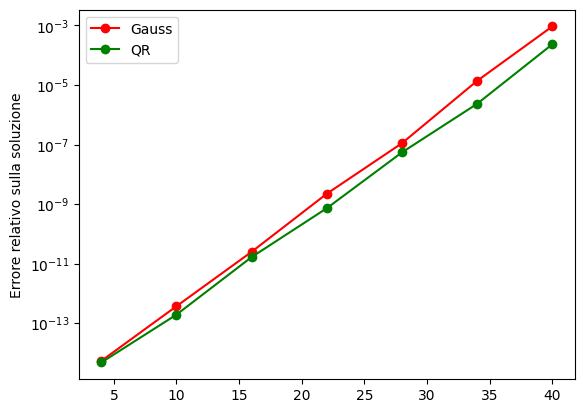

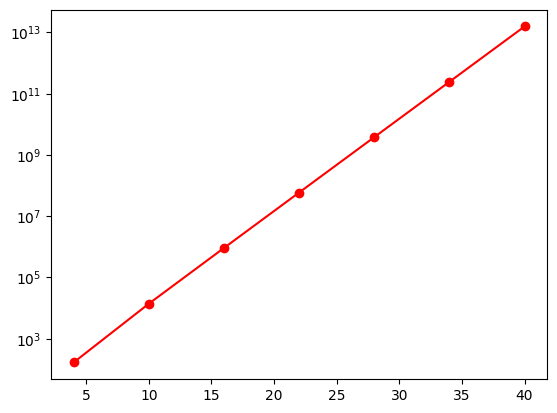

In [21]:
def Hankel(n):
    A = np.zeros((n, n), dtype=float)
    for i in range(0, n):
        for k in range(i + 1 - n, i + 1):
            if k > 0:
                A[i, n - 1 + k - i] = 2.0**(k + 1)
            else:
                A[i, n - 1 + k - i] = 2.0**(1 / (2 - k - 1))
    return A


# Implementaiont
indCond = []
err_rel = []
err_rel_qr = []
for n in range(4, 41, 6):

    A = Hankel(n)
    indCond.append(np.linalg.cond(A, 2))
    xesatta = np.ones((n, 1))
    b = np.dot(A, xesatta)
    PT, L, U = lu(A)
    P = PT.T
    x, flag = LUsolve(P, A, L, U, b)

    err_rel.append(np.linalg.norm(x-xesatta, 2)/np.linalg.norm(xesatta, 2))

    Q, R = sp.linalg.qr(A)

    y = np.dot(Q.T, b)
    xqr, flag = Usolve(R, y)
    err_rel_qr.append(np.linalg.norm(xqr-xesatta, 2) /
                      np.linalg.norm(xesatta, 2))

# Graph
plt.semilogy(range(4, 41, 6), err_rel, 'ro-',
             range(4, 41, 6), err_rel_qr, 'go-')
plt.legend(['Gauss', 'QR'])
plt.ylabel('Errore relativo sulla soluzione')
plt.show()
plt.semilogy(range(4, 41, 6), indCond, 'ro-')


Ripetere l'esercizio precedente per risolvere il sistema lineare $Ax = b$
con $A$ e $b$ cos\`i  definiti:
$$
a^{(n)}_{i,j}=
\left \{
\begin{array}{ll}
1 & \hbox{se} \ i=j \ \hbox{o \, se} \ j=n,\\
-1 & \hbox{se} \ i>j,\\
0 & \hbox{altrimenti}
\end{array}
\right .
\qquad
b = A \cdot [1, ..., 1]^T,
$$
per $n = 48 : 2 : 58$ e $b$ scelto in modo che risulti $x = [1, 1, ..., 1]^T$. Che
cosa si osserva?


In [22]:
def matrix(n):
    A = np.zeros((n, n), dtype=float)
    for i in range(0, n):
        for j in range(0, n):
            if i == j or j == n-1:
                A[i, j] = 1
            elif i > j:
                A[i, j] = -1
            else:
                A[i, j] = 0
    return A


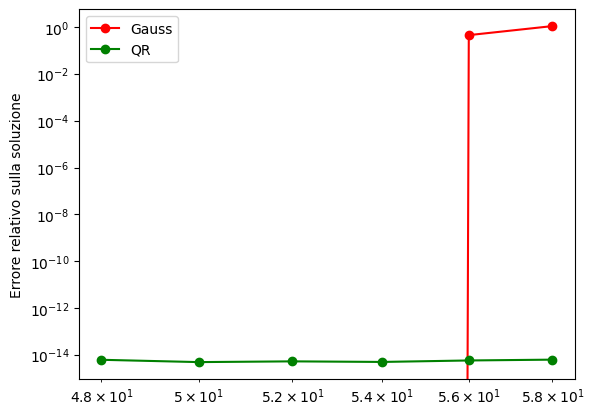

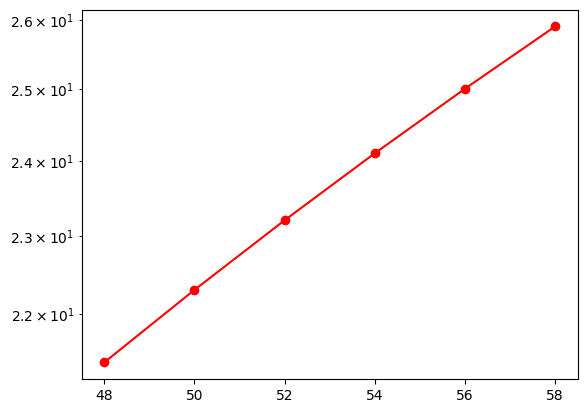

In [23]:
indCond = []
err_rel = []
err_rel_qr = []
for n in range(48, 59, 2):

    A = matrix(n)
    indCond.append(np.linalg.cond(A, 2))
    xesatta = np.ones((n, 1))
    b = np.dot(A, xesatta)
    PT, L, U = lu(A)
    P = PT.T
    x, flag = LUsolve(P, A, L, U, b)

    err_rel.append(np.linalg.norm(x-xesatta, 2)/np.linalg.norm(xesatta, 2))

    Q, R = sp.linalg.qr(A)

    y = np.dot(Q.T, b)
    xqr, flag = Usolve(R, y)
    err_rel_qr.append(np.linalg.norm(xqr-xesatta, 2) /
                      np.linalg.norm(xesatta, 2))


plt.loglog(range(48, 59, 2), err_rel, 'ro-',
           range(48, 59, 2), err_rel_qr, 'go-')
plt.legend(['Gauss', 'QR'])
plt.ylabel('Errore relativo sulla soluzione')
plt.show()
plt.semilogy(range(48, 60, 2), indCond, 'ro-')


## Esercizio 7
Implementare la  funzione $jacobi(A,b,x0,toll,itmax)$ per risolvere il  sistema lineare Ax=b utilizzando il Metodo iterativo di Jacobi. 
La funzione prende in input:
- A: matrice dei coefficienti
- b: termine noto
- x0: vettore iniziale della stessa dimensione di b
- toll: tolleranza per il criterio di arresto
- itmax: iterazioni massime oltre le quali il metodo si ferma

e restituisce in output:
- il vettore soluzione
- un vettore di tante componenti quanto il numero di iterazioni effettuate, contenente l'errore tra due iterazioni successive $||x^{(k)}-x^{(k-1)}||/||x^{(k)}||$
- il numero di iterazioni impiegate per calcolare la soluzione con la tolleranza richiesta


Calcolare il raggio spettrale della matrice di iterazione.

Implementare un criterio di arresto per il procedimento iterativo in termini di : $||x^{(k)}-x^{(k-1)}||/||x^{(k)}|| <toll$

In [24]:
def jacobi(A, b, x0, toll, itmax):
    # La dichiaro per buona norma anche se Python ha scope di lettura che va anche al di fuori
    # dell'ambito della funzione
    n = A.shape[0]
    # Estraggo la diagonale dalla matrice A
    d = np.diag(A)
    # Costruisco la matrice diagonale
    D = np.diag(d)
    # Creo la matrice triangola inferiore da A, -1 perchè escludo la diagonale
    E = np.tril(A, - 1)
    # Estraggo dalla matrice A la sua matrice triangolare superiore, con diagonale nulla
    F = np.triu(A, 1)

    # M = D, Si costruisce la matrice M
    N = - (E + F)

    # Cercando il raggio spettrale, devo vede che questo sia minore di 1 affinché ci sia una veloce
    # convergenza del metodo iterativo. Inversa di una matrice diagonale è una matrice diagonale con
    # elementi inversi
    invM = np.diag(1/d)
    T = np.dot(invM, N)

    # Il raggio spettrale di una matrice è il suo autovalore di modulo massimo
    autT = np.linalg.eigvals(T)
    rho = np.max(np.abs(autT))
    print("Raggio spettrale:    ", rho)
    if (rho > 1):
        print("Raggio spettrale maggiore di 1, nessuna soluzione")

    # Cuore dell'algoritmo: inizializzo il contatore delle iterazioni. Tengo traccia del vettore
    # degli errori per poi fare un grafico rappresentativo
    it = 0
    err_vet = []
    err = 1000

    # Imposto le condizioni di convergenza ad itmax iterate e alla quantità di errore maggiore
    # rispetto ad una determinata tolleranza. Moltiplicare per una matrice diagonale significa
    # dividere una matrice per la diagonale stessa
    while it <= itmax and err >= toll:
        x = (b + np.dot(N, x0)) / d.reshape(n, 1)
        # Se c'è convergenza le soluzioni non cambiano più
        err = np.linalg.norm(x - x0) / np.linalg.norm(x)
        err_vet.append(err)
        # Al passo successivo, x0 sarà la x del passo precedente
        x0 = x.copy()
        it += 1

    return x, it, err_vet


Raggio spettrale:     0.5586853131416273
Soluzione:    [[1.]
 [1.]
 [1.]]
Iterazioni:   35


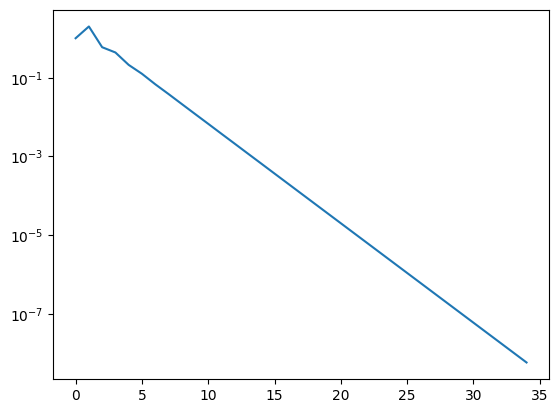

In [25]:
A = np.array([[4, 1, 3], [3, 4, 1], [1, 1, 17]])
# Creo il vettore colonna. Il vettore in questione, senza reshape è un array 1D che non è adatto
# alle operazioni con vettori colonna
n = A.shape[0]
b = np.sum(A, axis=1).reshape(n, 1)
# Posso scegliere un qualunque vettore iniziale
x0 = np.zeros((n, 1))
itmax = 100
toll = 1e-8
xJ, itJ, err_vetJ = jacobi(A, b, x0, toll, itmax)

print("Soluzione:   ", xJ)
print("Iterazioni:  ", itJ)

plt.semilogy(np.arange(itJ), err_vetJ)
plt.show()


## Esercizio 8
Implementare la  funzione $gauss$_$seidel(A,b,x0,toll,itmax)$ per risolvere il  sistema lineare Ax=b utilizzando il Metodo iterativo di Gauss-Seidel. 
La funzione prende in input:
- A: matrice dei coefficienti
- b: termine noto
- x0: vettore iniziale della stessa dimensione di b
- toll: tolleranza per il criterio di arresto
- itmax: iterazioni massime oltre le quali il metodo si ferma

e restituisce in output:
- il vettore soluzione
- un vettore di tante componenti quanto il numero di iterazioni effettuate, contenente l'errore tra due iterazioni successive $||x^{(k)}-x^{(k-1)}||/||x^{(k)}||$
- il numero di iterazioni impiegate per calcolare la soluzione con la tolleranza richiesta

Calcolare il raggio spettrale della matrice di iterazione.

Implementare un criterio di arresto per il procedimento iterativo in termini di : $||x^{(k)}-x^{(k-1)}||/||x^{(k)}|| <toll$

In [26]:
def gauss_seidel(A, b, x0, toll, itmax):
    # La dichiaro per buona norma anche se Python ha scope di lettura che va anche al di fuori
    # dell'ambito della funzione
    d = np.diag(A)
    D = np.diag(d)
    E = np.tril(A, - 1)
    F = np.triu(A, 1)

    # Devo introdurre un parametro omega che riduca il più possibile il raggio spettrale
    M = D + E
    N = -F
    invM = np.linalg.inv(M)
    T = np.dot(invM, N)

    # Il raggio spettrale di una matrice è il suo autovalore di modulo massimo
    autT = np.linalg.eigvals(T)
    rho = np.max(np.abs(autT))
    print("Raggio spettrale:    ", rho)
    if (rho > 1):
        print("Raggio spettrale maggiore di 1, nessuna soluzione")

    # Cuore dell'algoritmo: inizializzo il contatore delle iterazioni. Tengo traccia del vettore
    # degli errori per poi fare un grafico rappresentativo
    it = 0
    err_vet = []
    err = 1000

    # Imposto le condizioni di convergenza ad itmax iterate e alla quantità di errore maggiore
    # rispetto ad una determinata tolleranza. Moltiplicare per una matrice diagonale significa
    # dividere una matrice per la diagonale stessa
    while it <= itmax and err >= toll:
        temp = b - np.dot(F, x0)
        x, flag = Lsolve(M, temp)
        err = np.linalg.norm(x - x0) / np.linalg.norm(x)
        err_vet.append(err)
        x0 = x.copy()
        it += 1

    return x, it, err_vet


Raggio spettrale:     0.19431515030791588
Soluzione GS:     [[1.]
 [1.]
 [1.]]
Iterazioni GS:    13


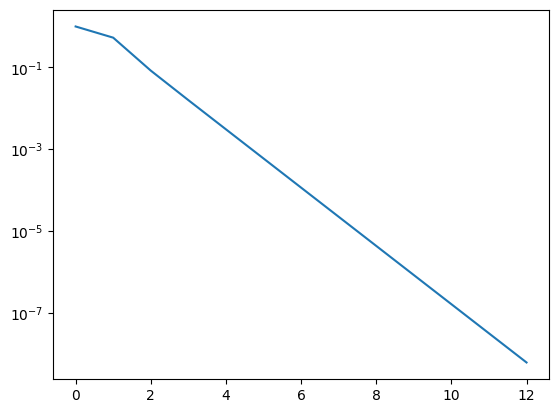

In [27]:
A = np.array([[4, 1, 3], [3, 4, 1], [1, 1, 17]])
n = A.shape[0]
b = np.sum(A, axis=1).reshape(n, 1)
# Posso scegliere un qualunque vettore iniziale
x0 = np.zeros((n, 1))
itmax = 100
toll = 1e-8
xG, itG, err_vetG = gauss_seidel(A, b, x0, toll, itmax)

print("Soluzione GS:    ", xG)
print("Iterazioni GS:   ", itG)

plt.semilogy(np.arange(itG), err_vetG)
plt.show()


## Esercizio 9
Testare i metodi di Jacobi e di Gauss Seidel nella soluzione dei - sistemai lineare Ax=b, dove 
- A=np.array([[4,1,3],[3,4,1],[1,1,17]]) 
- A=np.array([[3,0, 4],[7, 4, 3],[-1, -1 ,-2]])
- A=np.array([[5, 0, -1, 2],[ -2, 4, 1, 0],[0, -1, 4, -1],[ 2, 0, 0, 3]])

ed il termine noto del sistema è scelto in maniera tale che la soluzione esatta del sistema sia il vettore fatto da tutti 1.
Visualizzare in un grafico in scala logaritmica  l'errore per ogni iterazione per ciascun metodo. Cosa si osserva?
Porre toll=1e-8 it_max=500 e x0=np.zeros(A.shape[0])

Raggio spettrale:     0.5586853131416273
Raggio spettrale:     0.19431515030791588
Soluzione Jacobi:     [[1.]
 [1.]
 [1.]]
Iterazioni Jacobi:    35
Soluzione GS:     [[1.]
 [1.]
 [1.]]
Iterazioni GS:    13


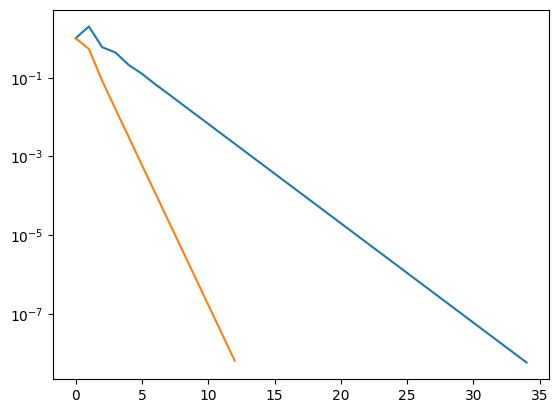

Raggio spettrale:     1.3748593749588476
Raggio spettrale maggiore di 1, nessuna soluzione
Raggio spettrale:     0.1250000000000001
Soluzione Jacobi:     [[7.98519558e+13]
 [1.46556882e+14]
 [8.23389075e+13]]
Iterazioni Jacobi:    101
Soluzione GS:     [[1.]
 [1.]
 [1.]]
Iterazioni GS:    12


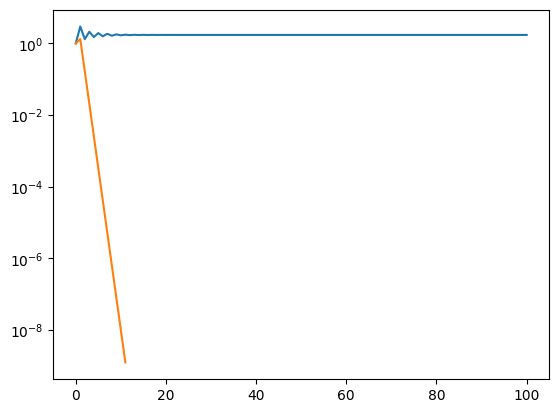

Raggio spettrale:     0.5287229642709422
Raggio spettrale:     0.12909944487358055
Soluzione Jacobi:     [[1.]
 [1.]
 [1.]
 [1.]]
Iterazioni Jacobi:    31
Soluzione GS:     [[1.]
 [1.]
 [1.]
 [1.]]
Iterazioni GS:    11


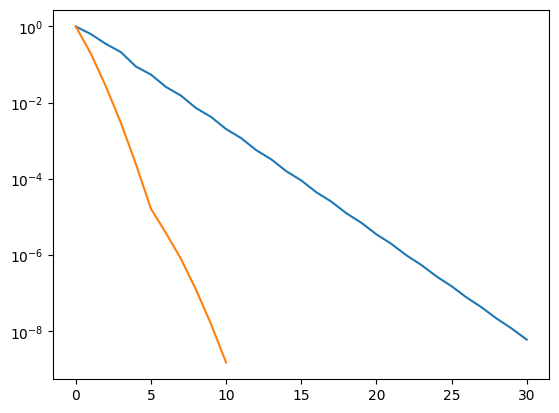

In [28]:
# Matrice 1
#
A = np.array([[4, 1, 3], [3, 4, 1], [1, 1, 17]])
n = A.shape[0]
b = np.sum(A, axis=1).reshape(n, 1)

x0 = np.zeros((n, 1))
itmax = 100
toll = 1e-8
# Test con Jacobi
xJ, itJ, err_vetJ = jacobi(A, b, x0, toll, itmax)
# Test con Gauss Seidel
xG, itG, err_vetG = gauss_seidel(A, b, x0, toll, itmax)

print("Soluzione Jacobi:    ", xJ)
print("Iterazioni Jacobi:   ", itJ)
print("Soluzione GS:    ", xG)
print("Iterazioni GS:   ", itG)

plt.semilogy(np.arange(itJ), err_vetJ)
plt.semilogy(np.arange(itG), err_vetG)
plt.show()

# Matrice 2
# Il metodo non converge ad una soluzione
A = np.array([[3, 0, 4], [7, 4, 3], [-1, -1, -2]])
n = A.shape[0]
b = np.sum(A, axis=1).reshape(n, 1)

x0 = np.zeros((n, 1))
itmax = 100
toll = 1e-8
# Test con Jacobi
xJ, itJ, err_vetJ = jacobi(A, b, x0, toll, itmax)
# Test con Gauss Seidel
xG, itG, err_vetG = gauss_seidel(A, b, x0, toll, itmax)

print("Soluzione Jacobi:    ", xJ)
print("Iterazioni Jacobi:   ", itJ)
print("Soluzione GS:    ", xG)
print("Iterazioni GS:   ", itG)

plt.semilogy(np.arange(itJ), err_vetJ)
plt.semilogy(np.arange(itG), err_vetG)
plt.show()

# Matrice 3
#
A = np.array([[5, 0, -1, 2], [-2, 4, 1, 0], [0, -1, 4, -1], [2, 0, 0, 3]])
n = A.shape[0]
b = np.sum(A, axis=1).reshape(n, 1)

x0 = np.zeros((n, 1))
itmax = 100
toll = 1e-8
# Test con Jacobi
xJ, itJ, err_vetJ = jacobi(A, b, x0, toll, itmax)
# Test con Gauss Seidel
xG, itG, err_vetG = gauss_seidel(A, b, x0, toll, itmax)

print("Soluzione Jacobi:    ", xJ)
print("Iterazioni Jacobi:   ", itJ)
print("Soluzione GS:    ", xG)
print("Iterazioni GS:   ", itG)

plt.semilogy(np.arange(itJ), err_vetJ)
plt.semilogy(np.arange(itG), err_vetG)
plt.show()


## Esercizio 10
Implementare la  funzione $gauss$_$seidel$_sor(A,b,x0,omega, toll,itmax) per risolvere il  sistema lineare Ax=b utilizzando il Metodo iterativo di Gauss-Seidel-SOR
La funzione prende in input:
- A: matrice dei coefficienti
- b: termine noto
- x0: vettore iniziale della stessa dimensione di b
- omega: il parametro di rilassamento
- toll: tolleranza per il criterio di arresto
- itmax: iterazioni massime oltre le quali il metodo si ferma

e restituisce in output:
- il vettore soluzione
- un vettore di tante componenti quanto il numero di iterazioni effettuate, contenente l'errore tra due iterazioni successive $||x^{(k)}-x^{(k-1)}||/||x^{(k)}||$
- il numero di iterazioni impiegate per calcolare la soluzione con la tolleranza richiesta

Calcolare il raggio spettrale della matrice di iterazione.

Implementare un criterio di arresto per il procedimento iterativo in termini di : $||x^{(k)}-x^{(k-1)}||/||x^{(k)}|| <toll$

In [29]:
def gauss_seidel_sor(A, b, x0, omega, toll, itmax):
    # La dichiaro per buona norma anche se Python ha scope di lettura che va anche al di fuori
    # dell'ambito della funzione
    errore = 1000
    d = np.diag(A)
    D = np.diag(d)
    Dinv = np.diag(1/d)
    E = np.tril(A, -1)
    F = np.triu(A, 1)

    # Devo introdurre un parametro omega che riduca il più possibile il raggio spettrale
    Momega = D+omega*E
    Nomega = (1-omega)*D-omega*F
    T = np.dot(np.linalg.inv(Momega), Nomega)

    # Il raggio spettrale di una matrice è il suo autovalore di modulo massimo
    autovalori = np.linalg.eigvals(T)
    raggiospettrale = np.max(np.abs(autovalori))
    print("raggio spettrale Gauss-Seidel SOR ", raggiospettrale)

    # Cuore dell'algoritmo: inizializzo il contatore delle iterazioni. Tengo traccia del vettore
    # degli errori per poi fare un grafico rappresentativo
    M = D+E
    N = -F
    it = 0
    xold = x0.copy()
    xnew = x0.copy()
    er_vet = []

    # Imposto le condizioni di convergenza ad itmax iterate e alla quantità di errore maggiore
    # rispetto ad una determinata tolleranza. Moltiplicare per una matrice diagonale significa
    # dividere una matrice per la diagonale stessa
    while it <= itmax and errore >= toll:
        temp = b-np.dot(F, xold)
        xtilde, flag = Lsolve(M, temp)
        xnew = (1-omega)*xold+omega*xtilde
        errore = np.linalg.norm(xnew-xold)/np.linalg.norm(xnew)
        er_vet.append(errore)
        xold = xnew.copy()
        it = it+1
    return xnew, it, er_vet


raggio spettrale Gauss-Seidel SOR  0.46537983832374846
Soluzione GSS:     [[1.]
 [1.]
 [1.]]
Iterazioni GSS:    24


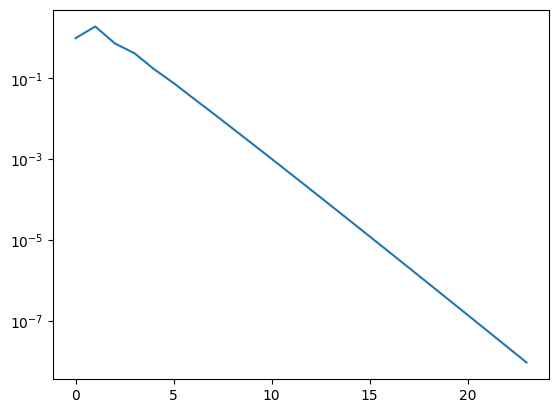

In [30]:
A = np.array([[4, 1, 3], [3, 4, 1], [1, 1, 17]])
n = A.shape[0]
b = np.sum(A, axis=1).reshape(n, 1)
# Posso scegliere un qualunque vettore iniziale
x0 = np.zeros((n, 1))
# omega deve avere un valore tra 0 e 2
omega = 1.4
itmax = 100
toll = 1e-8
xG, itG, err_vetG = gauss_seidel_sor(A, b, x0, omega, toll, itmax)

print("Soluzione GSS:    ", xG)
print("Iterazioni GSS:   ", itG)

plt.semilogy(np.arange(itG), err_vetG)
plt.show()


## Esercizio 11
Scrivere una funzione creaPoisson(n) che preso in input l'ordine della matrice quadrata di Poisson la costruzione secondo la seguente formula:
$$A =
\left [
\begin{array}{ccccccccccc}
4 & -1 & 0 & -1 &0 &0 & 0& 0& \cdots &   0 & 0\\
-1 & 4 & -1 & 0  &-1 &0 & 0& 0& \cdots &   0 & 0\\
0 & -1 & 4 & -1  &0 &-1 & 0& 0& \cdots &   0 & 0 \\
-1 & 0 & -1 & 4  &-1 &0  & -1 & 0& \cdots &   0 & 0\\
0 & -1 & 0 & -1  & 4 &-1 & 0 & -1& \cdots &   0 & 0\\
0 & 0 & -1 & 0  & -1 &4 & -1 & 0&  -1 & 0 & 0 \\
0 & 0 & 0 & \ddots  & 0 &\ddots & \ddots & \ddots& \ddots & \ddots & 0\\
0 & 0 & 0 & 0  & -1 &0  & -1 & 4& -1 &   0& -1\\
\end{array}
 \right ], \qquad
$$
- Risolvere il sistema lineare Ax=b con matrice dei coefficienti A di Poisson di ordine 10 e termine noto b scelto in maniera tale che il sistema abbia soluzione il vettore x con tutte le componenti  uguali ad 1, utilizzando  il metodo iterativo di Jacobi, Gauss-Seidel e Gauss-Seidel-Sor con parametro omega scelto tra 1 e 2 in maniera tale che il raggio spettrale della matrice di iterazione sia il più piccolo possibile e confrontare su un unico grafico l'andamento degli errori in scala logaritmica. Usare toll=1e-10.

In [31]:
def creaPoisson(n):
    # costruire una matrice di Poisson
    d = np.ones((n))*4
    e = -np.ones((n-1,))
    f = -np.ones((n-3,))
    A = np.diag(d)+np.diag(e, -1)+np.diag(e, 1)+np.diag(f, -3)+np.diag(f, 3)
    return A


Raggio spettrale:     0.8451732757464323
Raggio spettrale:     0.7185579379397855
raggio spettrale Gauss-Seidel SOR  0.9999999999845179


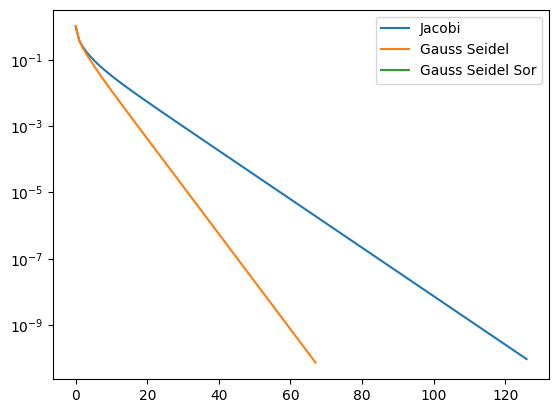

In [32]:
A = creaPoisson(10)
b = np.sum(A, axis=1)
toll = 1e-10
it_max = 1000
n = A.shape[0]
x0 = np.zeros(A.shape[0]).reshape(n, 1)
b = np.sum(A, axis=1).reshape(n, 1)
sol_jac, it_jac, err_vet_jac = jacobi(A, b, x0, toll, it_max)
plt.semilogy(np.arange(it_jac), err_vet_jac)
# print("sol=",sol_jac,"it ",it_jac)
solgs, itgs, err_vet_gs = gauss_seidel(A, b, x0, toll, it_max)
# print("solgs=",solgs,"it ",itgs)
plt.semilogy(np.arange(itgs), err_vet_gs)

omega = 1.4
solgs_sor, itgs_sor, err_vet_gs_sor = gauss_seidel_sor(
    A, b, x0, toll, it_max, omega)
# print("solgs_sor=",solgs_sor,"it ",itgs_sor)
plt.semilogy(np.arange(itgs_sor), err_vet_gs_sor)
plt.legend(['Jacobi', 'Gauss Seidel', 'Gauss Seidel Sor'])
plt.show()
